In [192]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/railofy-challenge/sample_submission.csv
/kaggle/input/railofy-challenge/Railofy_training_data_for_model.csv
/kaggle/input/railofy-challenge/Railofy_testing_data_for_model.csv


# Importing Libraries

In [193]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [194]:
train_df = pd.read_csv('/kaggle/input/railofy-challenge/Railofy_training_data_for_model.csv')
test_df = pd.read_csv('/kaggle/input/railofy-challenge/Railofy_testing_data_for_model.csv')
pd.set_option('max_columns', None)

In [195]:
train_df.head()

,pk,QT,GRCA,CCA,JD,ODD,JS,ODS,SL,NDTD,CURP,GROP,CANP,SBRA,SCRA,GRA,CURA,RPW,CUCA,CAR,BKT_2,CL_1,CL_2,CL_3,target
0,88315053602,GN,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.016290,0.204678,0.409357,0.167464,1.000539,0.919474,1.341754,1.820791,0.280196,-0.007556,1.091054,0,0,1,0,0
1,88315053603,GN,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.024623,0.216374,0.409357,0.157895,1.000539,0.919474,1.999409,3.810137,0.276128,-0.007556,1.143376,0,0,1,0,0
2,88314793081,GN,0.728882,0.524062,1.365898,0.885873,1.463205,0.767442,0,0.004357,0.089888,0.101124,0.010204,0.196907,0.003487,0.618700,0.742814,0.278101,0.435419,5.000000,0,0,0,0,0
3,88312760631,GN,5.000000,5.000000,0.298977,0.764192,0.354716,0.800000,0,0.003798,0.314147,0.328710,0.010960,0.678897,0.148338,1.117669,1.079367,0.266220,0.091167,5.000000,1,0,0,0,1
4,88312449843,GN,0.614226,0.389327,0.699606,0.917133,1.108489,0.862069,1,0.024571,0.253333,0.560000,0.227723,1.621770,2.129082,4.393867,5.000000,0.277710,2.103696,1.454895,1,0,1,0,0


In [196]:
test_df.head()

,pk,QT,GRCA,CCA,JD,ODD,JS,ODS,SL,NDTD,CURP,GROP,CANP,SBRA,SCRA,GRA,CURA,RPW,CUCA,CAR,BKT_2,CL_1,CL_2,CL_3
0,8831606085,GN,0.065517,0.041589,1.614476,1.000000,1.773582,0.975610,1,0.008326,0.375000,0.625000,0.153846,0.812225,0.058562,0.705277,1.457012,0.280196,1.335478,1.692308,0,0,0,1
1,8831561565,GN,2.710786,1.658815,0.927683,0.836028,0.665093,0.681818,1,0.013590,0.299094,0.368580,0.064789,0.465469,0.119819,-0.323278,-0.195543,0.276128,-0.537617,1.629686,0,1,0,0
2,8831539811,GN,3.365960,1.514607,1.546139,0.961232,1.418866,0.888889,1,0.008322,0.493917,0.688564,0.140845,0.533070,0.200964,0.305956,0.328951,0.276128,-0.093347,1.116554,0,1,0,0
3,8831313791,GN,2.342250,1.277346,0.990041,1.000000,0.842451,0.950000,1,0.007728,0.440559,0.695804,0.195710,1.078635,1.082519,0.446952,0.494185,0.271758,0.069792,1.442885,0,1,0,0
4,8831070109,GN,0.139225,0.054502,1.575182,0.817376,2.571694,0.773333,1,0.024999,0.411765,1.176471,0.419355,1.285086,1.975081,3.847262,3.497138,0.267730,1.296174,1.372434,0,0,1,0


# Checking Null Values

In [197]:
train_df.isna().sum().sum()

0

In [198]:
test_df.isna().sum().sum()

0

In [199]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36775 entries, 0 to 36774
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pk      36775 non-null  int64  
 1   QT      36775 non-null  object 
 2   GRCA    36775 non-null  float64
 3   CCA     36775 non-null  float64
 4   JD      36775 non-null  float64
 5   ODD     36775 non-null  float64
 6   JS      36775 non-null  float64
 7   ODS     36775 non-null  float64
 8   SL      36775 non-null  int64  
 9   NDTD    36775 non-null  float64
 10  CURP    36775 non-null  float64
 11  GROP    36775 non-null  float64
 12  CANP    36775 non-null  float64
 13  SBRA    36775 non-null  float64
 14  SCRA    36775 non-null  float64
 15  GRA     36775 non-null  float64
 16  CURA    36775 non-null  float64
 17  RPW     36775 non-null  float64
 18  CUCA    36775 non-null  float64
 19  CAR     36775 non-null  float64
 20  BKT_2   36775 non-null  int64  
 21  CL_1    36775 non-null  int64  
 22

In [200]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pk      3847 non-null   int64  
 1   QT      3847 non-null   object 
 2   GRCA    3847 non-null   float64
 3   CCA     3847 non-null   float64
 4   JD      3847 non-null   float64
 5   ODD     3847 non-null   float64
 6   JS      3847 non-null   float64
 7   ODS     3847 non-null   float64
 8   SL      3847 non-null   int64  
 9   NDTD    3847 non-null   float64
 10  CURP    3847 non-null   float64
 11  GROP    3847 non-null   float64
 12  CANP    3847 non-null   float64
 13  SBRA    3847 non-null   float64
 14  SCRA    3847 non-null   float64
 15  GRA     3847 non-null   float64
 16  CURA    3847 non-null   float64
 17  RPW     3847 non-null   float64
 18  CUCA    3847 non-null   float64
 19  CAR     3847 non-null   float64
 20  BKT_2   3847 non-null   int64  
 21  CL_1    3847 non-null   int64  
 22  

# EDA


### Correlation Matrix

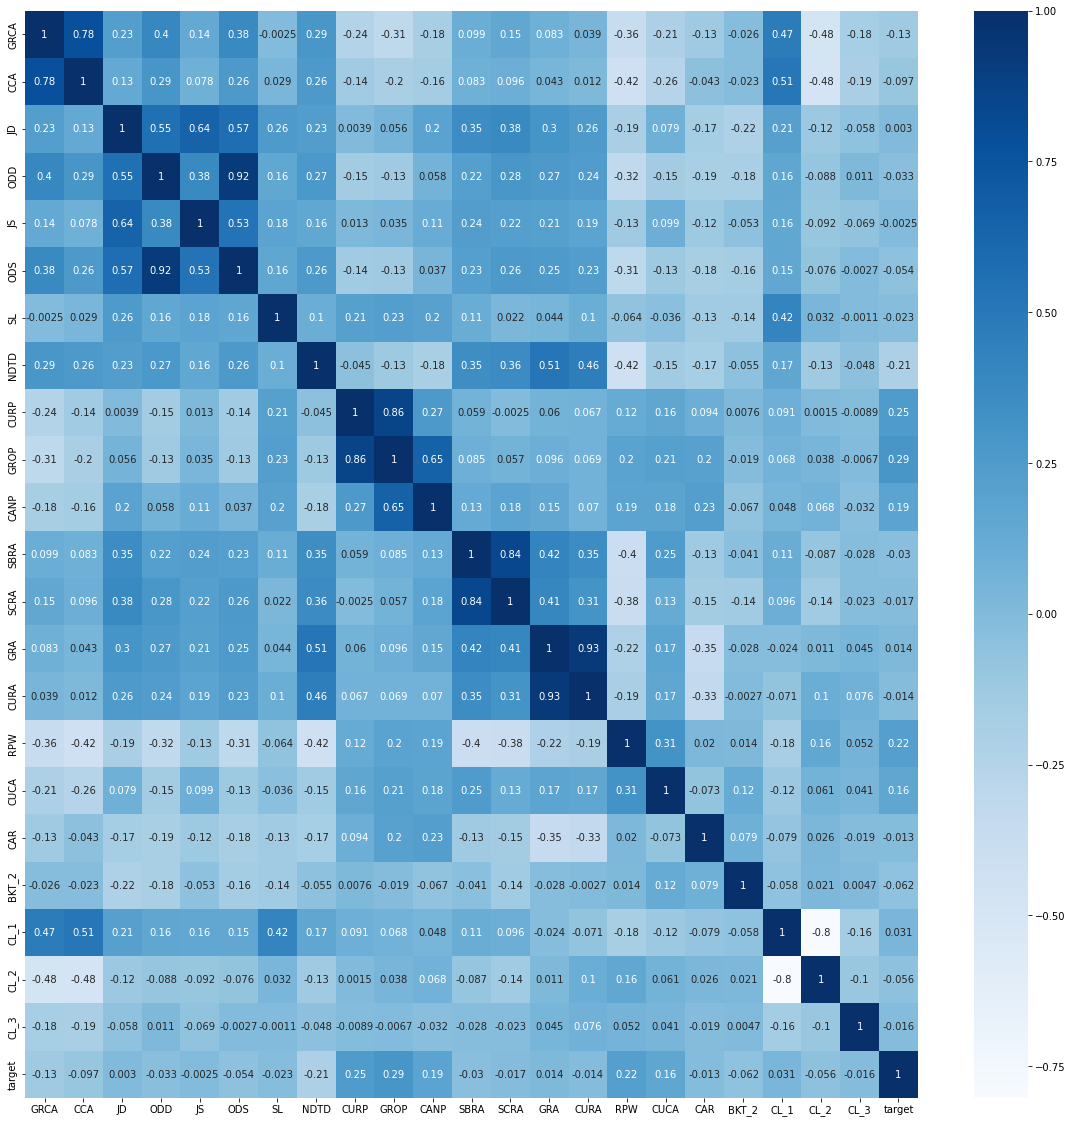

In [201]:
corr = train_df.loc[:,train_df.columns != 'pk'].corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr, annot = True, cmap = 'Blues');

### BoxPlot (outlier detection)

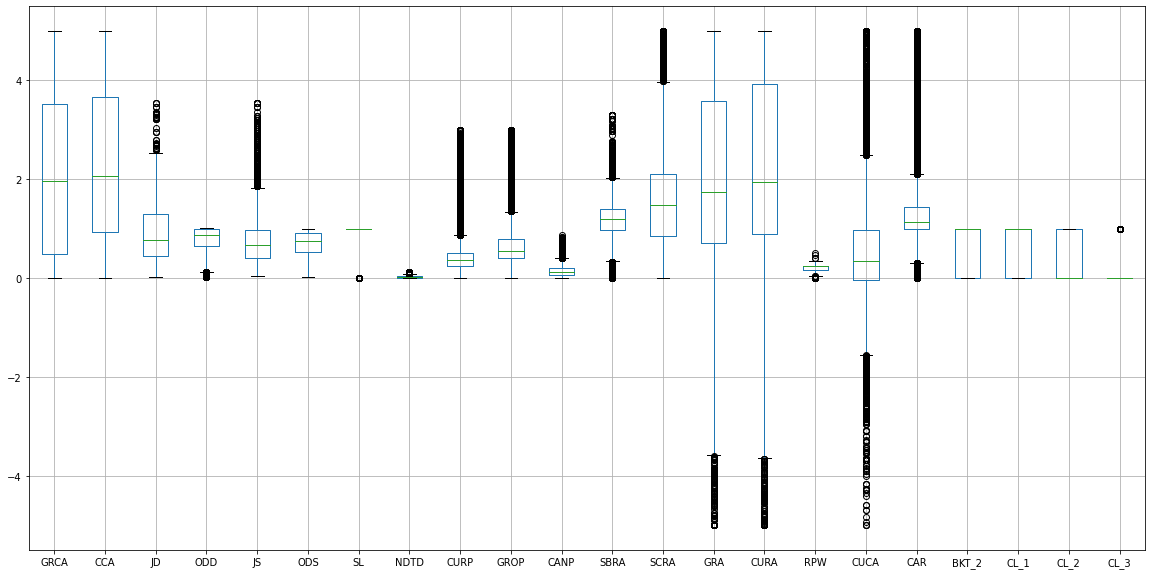

In [202]:
plt.figure(figsize = (20,10))
train_df.iloc[:, 1: -1].boxplot()
plt.show()

### Data Distribution

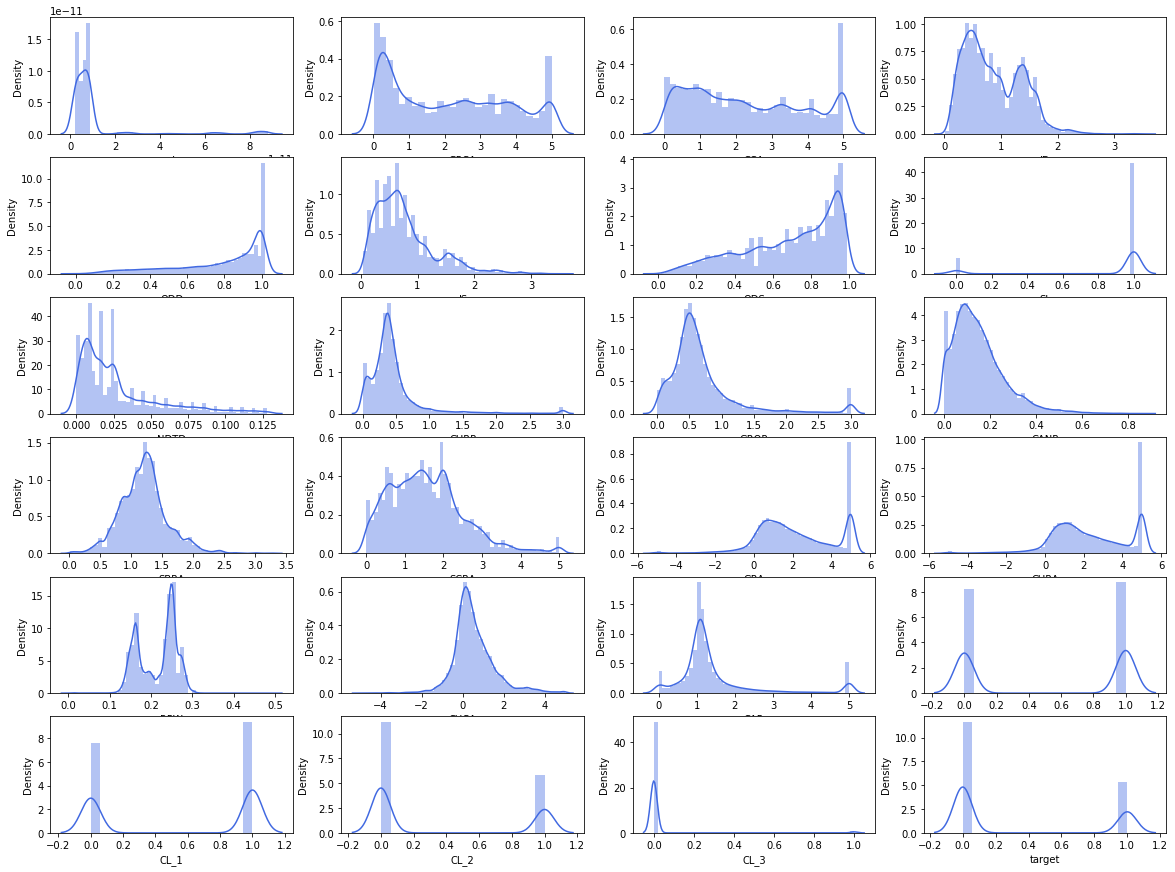

In [203]:
num_cols = train_df.dtypes[train_df.dtypes != 'object'].index.tolist()
plt.figure(figsize = (20,15))
for i in enumerate(num_cols):
    plt.subplot(6,4,i[0]+1)
    sns.distplot(train_df[i[1]], color = 'royalblue');
    

> ***We will use RobustSclaer for Outlier Treatment and StandardScaler to convert data into normal distribution***

# PreProcessing

In [204]:
train_df['QT'].value_counts()

GN    26576
RL     6648
PQ     3551
Name: QT, dtype: int64

In [205]:
def preprocessing(df, train = True):
    df = df.copy()
    dummies = pd.get_dummies(df['QT'], prefix = 'QT')
    df = pd.concat([df, dummies], axis = 1)
    df = df.drop(['pk', 'QT'], axis = 1)
    return df
        

In [206]:
train_df = preprocessing(train_df)
test_df1 = preprocessing(test_df)

# Scaling Data

In [207]:
target = train_df['target']
train_df = train_df.drop('target', axis = 1)
Rscaler = RobustScaler()
R_df = Rscaler.fit(train_df)
R_df = Rscaler.transform(train_df)
R_test = Rscaler.transform(test_df1)
Sscaler = StandardScaler()
Sscaler.fit(R_df)
R_df = pd.DataFrame(Sscaler.transform(R_df), index = train_df.index, columns = train_df.columns)
R_test = pd.DataFrame(Sscaler.transform(R_test), index = test_df1.index, columns = test_df1.columns)

# Train Test Split

In [208]:
x_train, x_test, y_train, y_test = train_test_split(R_df, target , test_size = 0.25, random_state = 42)


# Building Model

In [209]:
model = GradientBoostingClassifier(max_depth = 7)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Accuracy Score

In [210]:
print('-'*50)
print(f'\nTrainset Accuracy : {round(model.score(x_train, y_train), 4)*100}%')
print(f'\nTestset Accuracy : {round(model.score(x_test, y_test), 4)*100}%')


--------------------------------------------------

Trainset Accuracy : 94.0%

Testset Accuracy : 87.62%


# Confusion Matrix and Classification Report

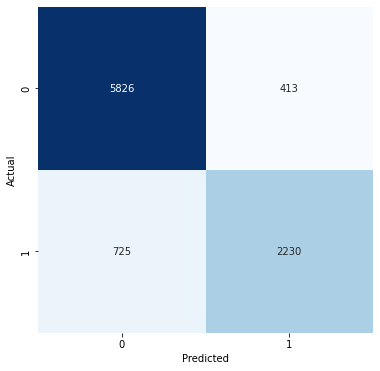

Classification Report ---------------------->
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6239
           1       0.84      0.75      0.80      2955

    accuracy                           0.88      9194
   macro avg       0.87      0.84      0.85      9194
weighted avg       0.87      0.88      0.87      9194



In [211]:
cm = confusion_matrix(y_test, y_pred, labels = [0,1])
clr = classification_report(y_test, y_pred, labels = [0,1])
plt.figure(figsize = (6,6))
sns.heatmap(cm, annot = True, fmt = 'g', cbar = False, cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(f'Classification Report ---------------------->\n{clr}')

# Submission

In [212]:
test_pred = model.predict_proba(test_df1)

In [213]:
test_df1

,GRCA,CCA,JD,ODD,JS,ODS,SL,NDTD,CURP,GROP,CANP,SBRA,SCRA,GRA,CURA,RPW,CUCA,CAR,BKT_2,CL_1,CL_2,CL_3,QT_GN,QT_PQ,QT_RL
0,0.065517,0.041589,1.614476,1.000000,1.773582,0.975610,1,0.008326,0.375000,0.625000,0.153846,0.812225,0.058562,0.705277,1.457012,0.280196,1.335478,1.692308,0,0,0,1,1,0,0
1,2.710786,1.658815,0.927683,0.836028,0.665093,0.681818,1,0.013590,0.299094,0.368580,0.064789,0.465469,0.119819,-0.323278,-0.195543,0.276128,-0.537617,1.629686,0,1,0,0,1,0,0
2,3.365960,1.514607,1.546139,0.961232,1.418866,0.888889,1,0.008322,0.493917,0.688564,0.140845,0.533070,0.200964,0.305956,0.328951,0.276128,-0.093347,1.116554,0,1,0,0,1,0,0
3,2.342250,1.277346,0.990041,1.000000,0.842451,0.950000,1,0.007728,0.440559,0.695804,0.195710,1.078635,1.082519,0.446952,0.494185,0.271758,0.069792,1.442885,0,1,0,0,1,0,0
4,0.139225,0.054502,1.575182,0.817376,2.571694,0.773333,1,0.024999,0.411765,1.176471,0.419355,1.285086,1.975081,3.847262,3.497138,0.267730,1.296174,1.372434,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3842,0.262070,0.605343,0.929392,0.450331,0.487735,0.523810,1,0.010740,0.125000,0.125000,0.000000,0.904280,0.980502,0.941921,1.684810,0.250342,0.855013,0.000000,1,0,1,0,0,0,1
3843,1.588799,1.854344,0.668854,0.812241,0.354716,0.533333,0,0.000000,0.113402,0.221649,0.088608,0.751765,0.417453,5.000000,5.000000,0.254550,0.325570,0.617527,0,0,0,0,0,0,1
3844,0.196552,0.778921,1.143801,0.895053,0.443396,0.714286,1,0.023755,0.208333,0.250000,0.033333,1.395810,2.093390,-0.335731,0.800839,0.269082,-0.322042,5.000000,0,0,1,0,0,0,1
3845,0.163794,1.591849,0.520220,0.819650,0.620754,0.777778,1,0.001722,0.100000,0.100000,0.000000,0.726074,0.465279,-0.148550,0.013804,0.254550,0.124584,0.000000,0,1,0,0,0,0,1


In [214]:
test_submission = pd.DataFrame()
test_submission['pk'] = test_df['pk']
test_submission['target'] = test_pred[:,1]
test_submission.to_csv('test_submission.csv', index=False)

In [215]:
test_submission

,pk,target
0,8831606085,0.532041
1,8831561565,0.954032
2,8831539811,0.925378
3,8831313791,0.913709
4,8831070109,0.836392
...,...,...
3842,2139056922,0.257753
3843,2138303681,0.889965
3844,2138033785,0.195111
3845,2137893302,0.580171
